In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

sns.set()

## Statistical Power

**Type I error**  
  
Rejecting the null when it is actaully true, denoted by $\alpha$. It is essentially a false positive because we  recommend a treatment when it actually does not work.

**Type II error** 
  
Do not reject the null when it is actaully false, denoted by $\beta$. It is a false negative because we end up not recomending a treatment that works.

**Significance level** 

A significance level of 0.05 means that there is a 5% chance of a false positive. Choosing level of significance is an arbitrary task, but for many applications, a level of 5% is chosen, for no better reason than that it is conventional

**Power**

Power of 0.80 means that there is an 80% chance that if there was an effect, we would detect it (or a 20% chance that we'd miss the effect). In other words, power is equivalent to $1 - \beta$. There are no formal standards for power, most researchers assess the power of their tests using 0.80 for adequacy


|   Scenario   |          $H_0$ is true              |       $H_0$ is false     |
|--------------|:-----------------------------------:|-------------------------:|
| Accept $H_0$ |         Correct Decision            | Type 2 Error (1 - power) |
| Reject $H_0$ | Type 1 Error (significance level)   |      Correct decision    |

### Intuition

A good way to get a feel for the underlying mechanics is to plot the probability distribution of $z$ assuming that the null hypothesis is true. Then do the same assuming that the alternative hypothesis is true, and overlay the two plots.

Consider the following example:
* $H_0$: $p_a = p_b$
* $H_1$: $p_a > p_b$

$n_1 = 2500, n_2 = 2500, p_1 = 0.08, p_2 = 0.10$

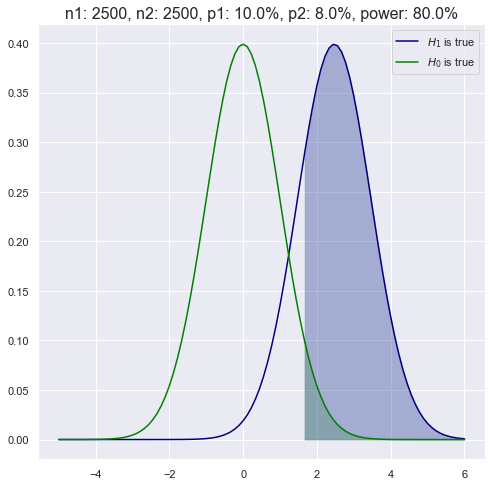

In [22]:
def plot_power(
    n1: int,
    n2: int,
    p1: float,
    p2: float,
    significance: float = 0.05
)-> plt.Figure:
    counts= np.array([p1*n1, p2*n2])
    nobs = np.array([n1, n2])
    zscore, _ = proportions_ztest(counts, nobs, alternative = 'larger')
    
    #calucalte distributions
    h0_dist = stats.norm(loc = 0, scale = 1)
    h1_dist = stats.norm(loc = zscore, scale = 1)
    
    # calculate threshold and power
    x = np.linspace(-5, 6, num = 100)
    threshold = h0_dist.ppf(1 - significance)
    mask = x > threshold
    power = np.round(1 - h1_dist.cdf(threshold), 2)
    
    #plot figure    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(1, 1, 1)
    
    sns.lineplot(x=x, y=h1_dist.pdf(x), label="$H_1$ is true", ax=ax, color="navy")
    ax.fill_between(x = x[mask], y1 = 0.0, y2 = h1_dist.pdf(x)[mask],alpha = 0.2, color="navy")
    
    sns.lineplot(x=x, y=h0_dist.pdf(x), label="$H_0$ is true", ax=ax, color="green")
    ax.fill_between(x = x[mask], y1 = 0.0, y2 = h0_dist.pdf(x)[mask],alpha = 0.2, color="green")
    
    ax.fill_between(x = x[mask], y1 = 0.0, y2 = h1_dist.pdf(x)[mask],alpha = 0.2)
    ax.set_title(f"n1: {n1}, n2: {n2}, p1: {p1*100}%, p2: {p2*100}%, power: {power*100}%", fontsize=16)

    plt.show()

plot_power(n1=2500, n2=2500, p1=0.10, p2=0.08)   

The shaded green area denotes the significance region, while the shaded blue area denotes the power (note that it includes the shaded green area). Note that if we pick a smaller N, or a smaller probability difference between the control and experiment group, the power drops (the shaded blue area decreases), meaning that if there’s is in fact a change, there’s lesser percent chance that we’ll detect it.

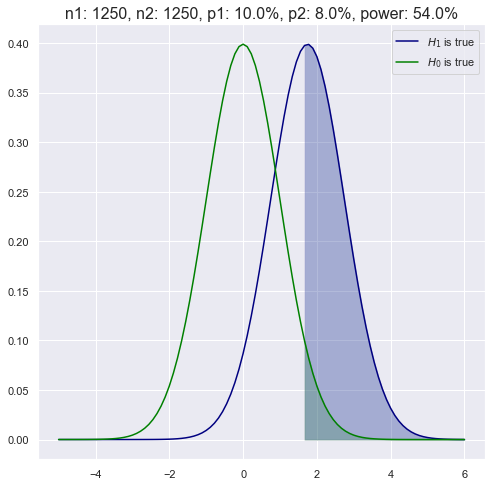

In [18]:
plot_power(n1=1250, n2=1250, p1=0.10, p2=0.08)  

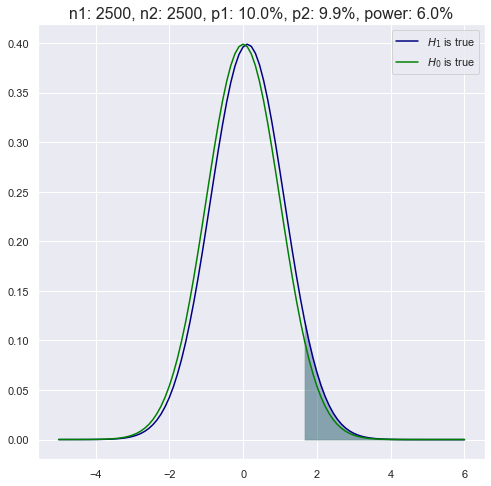

In [21]:
plot_power(n1=2500, n2=2500, p1=0.10, p2=0.099)  